In [1]:
# https://medium.com/@randerson112358/nba-data-analysis-exploration-9293f311e0e8
# https://github.com/randerson112358/Python/tree/master/NBA_Basketball_Exploration

# Import dependencies
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Load data
nba = pd.read_csv('nba_2013.csv')

In [3]:
# Show first 7 results from dataframe
nba.head(7)

,player,pos,age,bref_team_id,g,gs,mp,fg,fga,fg.,...,drb,trb,ast,stl,blk,tov,pf,pts,season,season_end
0,Quincy Acy,SF,23,TOT,63,0,847,66,141,0.468,...,144,216,28,23,26,30,122,171,2013-2014,2013
1,Steven Adams,C,20,OKC,81,20,1197,93,185,0.503,...,190,332,43,40,57,71,203,265,2013-2014,2013
2,Jeff Adrien,PF,27,TOT,53,12,961,143,275,0.520,...,204,306,38,24,36,39,108,362,2013-2014,2013
3,Arron Afflalo,SG,28,ORL,73,73,2552,464,1011,0.459,...,230,262,248,35,3,146,136,1330,2013-2014,2013
4,Alexis Ajinca,C,25,NOP,56,30,951,136,249,0.546,...,183,277,40,23,46,63,187,328,2013-2014,2013
5,Cole Aldrich,C,25,NYK,46,2,330,33,61,0.541,...,92,129,14,8,30,18,40,92,2013-2014,2013
6,LaMarcus Aldridge,PF,28,POR,69,69,2498,652,1423,0.458,...,599,765,178,63,68,123,147,1603,2013-2014,2013


In [4]:
# Show mean of columns within the dataframe
nba.mean()

age             26.509356
g               53.253638
gs              25.571726
mp            1237.386694
fg             192.881497
fga            424.463617
fg.              0.436436
x3p             39.613306
x3pa           110.130977
x3p.             0.285111
x2p            153.268191
x2pa           314.332640
x2p.             0.466947
efg.             0.480752
ft              91.205821
fta            120.642412
ft.              0.722419
orb             55.810811
drb            162.817048
trb            218.627859
ast            112.536383
stl             39.280665
blk             24.103950
tov             71.862786
pf             105.869023
pts            516.582121
season_end    2013.000000
dtype: float64

In [5]:
# Show mean of a specfic column
nba.loc[:,'fg'].mean()

192.88149688149687

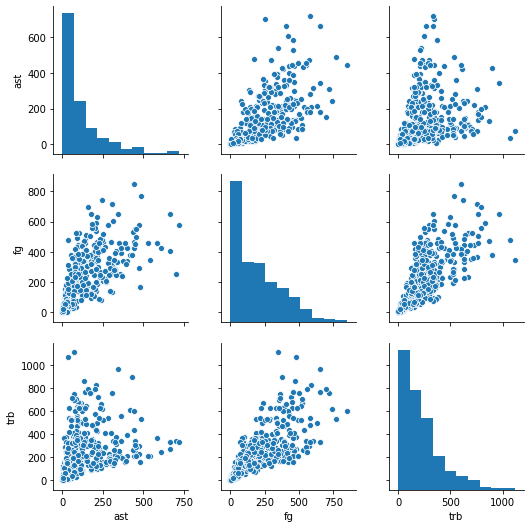

In [8]:
# Create pairwise scatter plots to show how columns correlate
sns.pairplot(nba[['ast', 'fg', 'trb']])
plt.show()

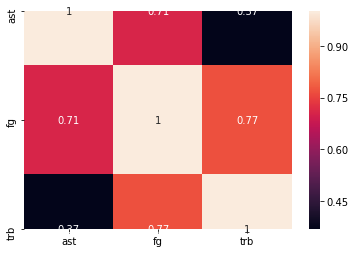

In [9]:
# Create heatmap for better visualization
correlation = nba[['ast', 'fg', 'trb']].corr()
sns.heatmap(correlation, annot=True)

In [10]:
# Utilizing KMeans for clustering players
from sklearn.cluster import KMeans
kmeans_model = KMeans(n_clusters=5, random_state=1)
good_columns = nba._get_numeric_data().dropna(axis=1)
kmeans_model.fit(good_columns)
labels = kmeans_model.labels_
labels

array([0, 0, 0, 3, 0, 2, 3, 0, 4, 4, 4, 2, 4, 4, 1, 0, 4, 3, 2, 0, 1, 2,
       0, 0, 1, 2, 0, 2, 2, 2, 4, 4, 1, 4, 2, 1, 4, 3, 4, 2, 0, 3, 0, 1,
       0, 4, 2, 2, 0, 4, 4, 4, 4, 2, 2, 4, 0, 4, 1, 3, 1, 4, 1, 2, 4, 2,
       2, 2, 2, 0, 2, 1, 1, 4, 1, 2, 2, 0, 0, 0, 1, 4, 2, 1, 1, 3, 4, 1,
       4, 1, 2, 2, 0, 2, 2, 4, 2, 1, 0, 3, 2, 3, 2, 2, 1, 1, 0, 4, 2, 2,
       3, 4, 2, 2, 2, 3, 0, 4, 2, 2, 2, 0, 1, 3, 1, 0, 0, 0, 3, 3, 4, 1,
       1, 3, 2, 2, 3, 2, 0, 0, 1, 1, 0, 2, 1, 2, 4, 2, 4, 4, 1, 2, 2, 0,
       1, 0, 0, 0, 1, 1, 3, 0, 3, 1, 4, 2, 2, 2, 2, 2, 1, 3, 0, 2, 4, 4,
       1, 3, 0, 3, 2, 0, 2, 0, 4, 3, 4, 2, 2, 0, 2, 2, 2, 1, 0, 1, 0, 3,
       1, 0, 1, 1, 1, 4, 1, 4, 2, 1, 0, 2, 2, 0, 3, 0, 4, 3, 4, 4, 3, 2,
       1, 1, 2, 2, 2, 3, 2, 2, 2, 3, 1, 2, 3, 0, 1, 0, 0, 3, 2, 1, 2, 2,
       0, 2, 1, 1, 0, 0, 1, 2, 4, 4, 0, 3, 1, 4, 2, 2, 0, 4, 2, 2, 1, 2,
       1, 3, 2, 1, 2, 0, 0, 2, 3, 1, 4, 0, 1, 3, 3, 2, 4, 0, 1, 4, 0, 0,
       1, 2, 3, 2, 2, 4, 0, 0, 2, 2, 1, 1, 1, 2, 1,

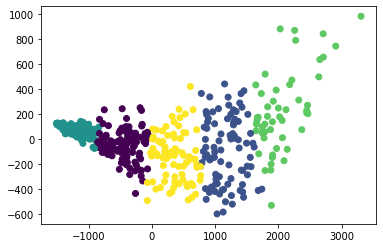

In [12]:
# Make data 2-Dimensional w/ PCA for visualization
from sklearn.decomposition import PCA
pca_2 = PCA(2)
plot_columns = pca_2.fit_transform(good_columns)
plt.scatter(x=plot_columns[:,0], y=plot_columns[:,1], c=labels)
plt.show()

In [13]:
# Raw PCA Data (coordinates for each player)
plot_columns

array([[-6.27969797e+02, -1.30839821e+02],
       [-2.44268597e+02, -2.04096273e+02],
       [-3.38828831e+02,  5.78889920e+01],
       [ 1.74969229e+03,  5.08746550e+01],
       [-3.83105785e+02,  4.99993062e+00],
       [-1.13423594e+03,  6.09155972e+01],
       [ 2.25796631e+03,  8.72646912e+02],
       [-2.74018472e+02, -4.91584788e+01],
       [ 6.51594149e+02, -3.68598261e+02],
       [ 2.80257375e+01,  4.17702838e+00],
       [ 7.72722373e+02, -2.88996107e+02],
       [-1.30782656e+03,  7.78270023e+01],
       [ 7.46758527e+01, -1.13379495e+02],
       [ 4.27602950e+02, -3.54396243e+02],
       [ 1.11065367e+03, -4.05383385e+02],
       [-4.74415284e+02,  9.09308787e+01],
       [ 5.49938152e+02, -3.57592577e+02],
       [ 2.90757493e+03,  7.46898936e+02],
       [-1.31941705e+03,  6.64245173e+01],
       [-4.21874643e+02, -7.17577224e+01],
       [ 1.68210924e+03, -4.08218490e+02],
       [-1.39428553e+03,  1.10713700e+02],
       [-1.22831506e+02, -1.78978791e+01],
       [-4.

In [14]:
# See if two players (Bron and KD) are in the same cluster
LeBron = good_columns.loc[ nba['player'] == 'LeBron James',: ]
Durant = good_columns.loc[ nba['player'] == 'Kevin Durant',: ]

print(LeBron)
print(Durant)

     age   g  gs    mp   fg   fga  x3p  x3pa  x2p  x2pa  ...  orb  drb  trb  \
225   29  77  77  2902  767  1353  116   306  651  1047  ...   81  452  533   

     ast  stl  blk  tov   pf   pts  season_end  
225  488  121   26  270  126  2089        2013  

[1 rows x 22 columns]
     age   g  gs    mp   fg   fga  x3p  x3pa  x2p  x2pa  ...  orb  drb  trb  \
133   25  81  81  3122  849  1688  192   491  657  1197  ...   58  540  598   

     ast  stl  blk  tov   pf   pts  season_end  
133  445  103   59  285  174  2593        2013  

[1 rows x 22 columns]


In [15]:
# Convert player df to lists
Lebron_list = LeBron.values.tolist()
Durant_list = Durant.values.tolist()

# Predict which group Bron and KD belong to
Lebron_Cluster_Label = kmeans_model.predict(Lebron_list)
Durant_Cluster_Label = kmeans_model.predict(Durant_list)

print(Lebron_Cluster_Label)
print(Durant_Cluster_Label)

[3]
[3]


In [16]:
# Look at the correlation between all columns
nba.corr()

,age,g,gs,mp,fg,fga,fg.,x3p,x3pa,x3p.,...,orb,drb,trb,ast,stl,blk,tov,pf,pts,season_end
age,1.000000,-0.012074,0.025163,0.007961,-0.009749,-0.018304,0.025221,0.050611,0.028850,0.014235,...,-0.068726,0.010822,-0.013451,0.019216,-0.028315,-0.017398,-0.030789,-0.028221,-0.011910,NaN
g,-0.012074,1.000000,0.610951,0.864487,0.739993,0.746963,0.322201,0.518074,0.537011,0.103762,...,0.546902,0.707389,0.682688,0.551128,0.709650,0.475581,0.713508,0.865797,0.728462,NaN
gs,0.025163,0.610951,1.000000,0.860036,0.821619,0.811531,0.234677,0.501808,0.515718,0.063468,...,0.560067,0.774892,0.735738,0.636059,0.743178,0.505589,0.767107,0.725573,0.810294,NaN
mp,0.007961,0.864487,0.860036,1.000000,0.931120,0.936883,0.273682,0.645056,0.666126,0.138230,...,0.576844,0.821145,0.774492,0.733041,0.852331,0.506254,0.885406,0.884484,0.927464,NaN
fg,-0.009749,0.739993,0.821619,0.931120,1.000000,0.988262,0.278007,0.597239,0.613988,0.110514,...,0.562293,0.820259,0.769339,0.708228,0.786597,0.484208,0.903383,0.798769,0.992041,NaN
fga,-0.018304,0.746963,0.811531,0.936883,0.988262,1.000000,0.211174,0.662004,0.685535,0.152111,...,0.487154,0.771821,0.710910,0.748141,0.803290,0.412738,0.910689,0.786560,0.989211,NaN
fg.,0.025221,0.322201,0.234677,0.273682,0.278007,0.211174,1.000000,-0.025510,-0.041720,-0.039424,...,0.423358,0.377067,0.404832,0.068105,0.185385,0.401431,0.221846,0.359125,0.248276,NaN
x3p,0.050611,0.518074,0.501808,0.645056,0.597239,0.662004,-0.025510,1.000000,0.991700,0.462709,...,-0.065822,0.280171,0.182848,0.617553,0.592092,-0.043707,0.560520,0.446711,0.655342,NaN
x3pa,0.028850,0.537011,0.515718,0.666126,0.613988,0.685535,-0.041720,0.991700,1.000000,0.449886,...,-0.058075,0.291838,0.193712,0.643211,0.622973,-0.040987,0.589799,0.463455,0.672076,NaN
x3p.,0.014235,0.103762,0.063468,0.138230,0.110514,0.152111,-0.039424,0.462709,0.449886,1.000000,...,-0.314490,-0.094895,-0.166848,0.212819,0.150476,-0.187411,0.097876,-0.019089,0.144431,NaN


In [17]:
# Predict number of assists per player based on field goals made
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(nba[['fg']], 
                                                    nba[['ast']],
                                                    test_size=0.2,
                                                    random_state=42)

In [18]:
# Create Linear Regression Model for prediction
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train, y_train)
predictions = lr.predict(x_test)

print(predictions)
print(y_test)

[[121.94310565]
 [ 24.72153471]
 [ 77.60579583]
 [252.28411286]
 [219.69886106]
 [ 70.12721345]
 [ 17.77713678]
 [178.03247351]
 [ 58.37515542]
 [ 70.12721345]
 [117.13544555]
 [ 30.06337926]
 [214.3570165 ]
 [ 24.18735025]
 [143.84466834]
 [ 22.05061243]
 [133.69516368]
 [  9.23018549]
 [131.55842586]
 [167.88296885]
 [ 21.51642797]
 [ 45.02054402]
 [ 31.13174818]
 [102.17828079]
 [233.05347245]
 [ 67.45629117]
 [236.25857919]
 [ 38.0761461 ]
 [ 64.78536889]
 [ 43.41799066]
 [  8.69600103]
 [ 16.70876787]
 [119.80636783]
 [266.17290871]
 [ 24.18735025]
 [152.92580409]
 [151.85743518]
 [ 22.58479688]
 [ 38.0761461 ]
 [ 14.57203005]
 [ 16.17458341]
 [301.42908279]
 [  8.16181658]
 [160.93857092]
 [ 46.08891294]
 [  9.76436994]
 [  8.16181658]
 [ 16.17458341]
 [ 71.19558236]
 [  9.76436994]
 [ 48.75983522]
 [157.73346419]
 [ 19.37969015]
 [100.04154297]
 [ 10.2985544 ]
 [ 83.48182484]
 [ 24.72153471]
 [323.86482993]
 [  9.76436994]
 [ 26.32408807]
 [ 82.94764038]
 [144.3788528 ]
 [106.45

In [19]:
# Get R^2 score & MSE to see how good the model is
lr_confidence = lr.score(x_test, y_test)
print("lr confidence (R^2): ", lr_confidence)

from sklearn.metrics import mean_squared_error
print("Mean Squared Error (MSE): ", mean_squared_error(y_test, predictions))

lr confidence (R^2):  0.5877700445514937
Mean Squared Error (MSE):  5257.168578022499
